# Importing the Libraries:

In [34]:
import pandas as pd
import numpy as np

In [35]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv",encoding="latin-1")
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
3215,307500,The Sweet Boutique,1,New Delhi,"D-30, 3rd Floor, Defence Colony, New Delhi",Defence Colony,"Defence Colony, New Delhi",77.236840,28.572495,Bakery,...,Indian Rupees(Rs.),No,No,No,No,1,3.3,Orange,Average,25
3221,9706,Amici Cafe,1,New Delhi,"8, Defence Colony Market, Defence Colony, New ...",Defence Colony,"Defence Colony, New Delhi",77.230232,28.573554,"Cafe, Italian",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.6,Yellow,Good,386
3720,2591,Hot N Chilly,1,New Delhi,"17, LSC, Block, Masjid Moth, Greater Kailash (...",Greater Kailash (GK) 2,"Greater Kailash (GK) 2, New Delhi",77.239123,28.537826,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,14
9449,6401485,The Creamery,189,Cape Town,"Newlands Quarter, Dean Street, Newlands, Cape ...",Newlands,"Newlands, Cape Town",18.461950,-33.970286,"Desserts, Ice Cream",...,Rand(R),No,No,No,No,2,4.5,Dark Green,Excellent,328
2051,18411846,Desi Thaat,1,Gurgaon,"Near Omaxe Mall, P.D. Arcade, Sector 49, Near ...",Sohna Road,"Sohna Road, Gurgaon",77.043089,28.411835,"North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,Average,21


In [37]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

no null value in dataset

In [38]:
#check dataset
df.shape

(9551, 21)

In [39]:
#check columns
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [40]:
#checking data types of columns
df.dtypes 

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

Observation:

There are two types of data present in the dataset categorical and numerical

In [41]:
#checking the information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Observation:

Majority of data is missing in the columns Cuisines 9542...

In [42]:
#checking if missing values present
df.isnull().values.any()

True

In [43]:
#checking the missing values of top 20 columns
df.isnull().sum().sort_values(ascending=False).head(20)

Cuisines                9
Restaurant ID           0
Currency                0
Rating text             0
Rating color            0
Aggregate rating        0
Price range             0
Switch to order menu    0
Is delivering now       0
Has Online delivery     0
Has Table booking       0
Average Cost for two    0
Restaurant Name         0
Latitude                0
Longitude               0
Locality Verbose        0
Locality                0
Address                 0
City                    0
Country Code            0
dtype: int64

only cuisines have missing value in this data set

<AxesSubplot:>

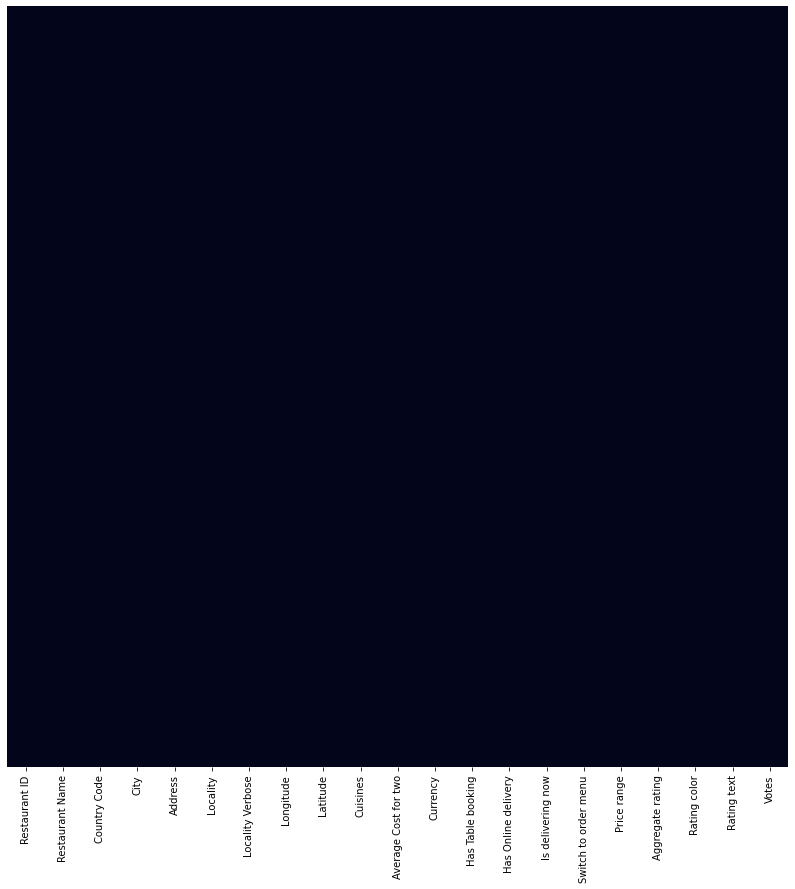

In [44]:
#Visualizing missing values through heatmap
plt.figure(figsize=(14,14))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [45]:
#filling missing values in categorical columns as NA
columns = ["Cuisines"]
df[columns] = df[columns].fillna('NA')

In [46]:
#checking the missing values of top 20 columns
df.isnull().sum().sort_values(ascending=False).head(20)

Restaurant ID           0
Currency                0
Rating text             0
Rating color            0
Aggregate rating        0
Price range             0
Switch to order menu    0
Is delivering now       0
Has Online delivery     0
Has Table booking       0
Average Cost for two    0
Restaurant Name         0
Cuisines                0
Latitude                0
Longitude               0
Locality Verbose        0
Locality                0
Address                 0
City                    0
Country Code            0
dtype: int64

In [47]:
#in dataframe cheak how much categorical columns avalaibe..
for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*******************************************************************************************************')
        print('\n')

Restaurant Name : ['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A\x81ô\x81ôk Kahve' "Walter's Coffee Roastery"]
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64
*******************************************************************************************************


City : ['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenpo

Summary statistics

In [48]:
#checking out the statistical summary of our dataset
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


1. Maximum standard deviation of 16121 Average Cost for two and minimum .90 in Price range
2.maximum avrage cost for two observed is 800000 and minimum is 0
3.max Price range 4 and minimum is .90 

In [49]:
!pip install openpyxl
df1 = pd.read_excel('Country-Code.xlsx')
df1.head(5)

Defaulting to user installation because normal site-packages is not writeable


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


# Data merging

In [50]:
df2 = pd.merge(df,df1,on='Country Code',how='left')
df2.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [51]:
#checking correlation
df2_cor=df2.corr()
df2_cor

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


For better understanding we will check the correlation with the help of heatmap.

# EDA

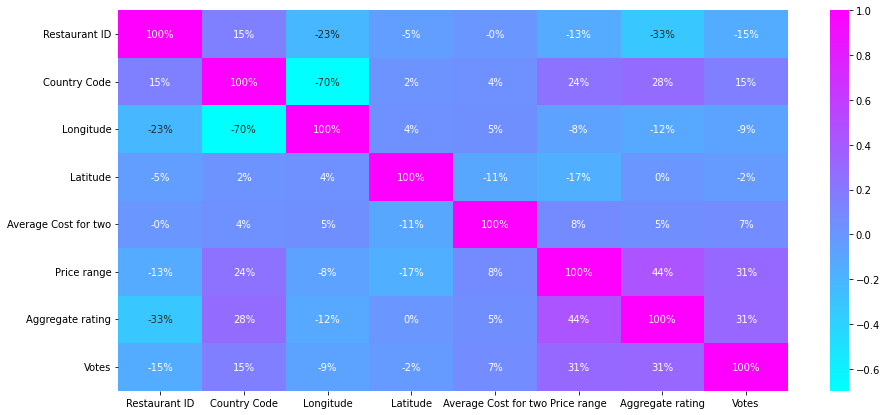

In [52]:
plt.figure(figsize=(15,7))
sns.heatmap(df2_cor,annot=True,fmt='.0%',cmap='cool')
plt.show()

# List of counteris the survey is spread accross -

In [53]:
print('List of counteris the survey is spread accross - ')
for x in pd.unique(df2.Country): print(x)
print()
print('Total number to country', len(pd.unique(df2.Country)))

List of counteris the survey is spread accross - 
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey

Total number to country 15


In [54]:
from plotly.offline import init_notebook_mode, plot, iplot

labels = list(df2.Country.value_counts().index)
values = list(df2.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

As Zomato is a startup from India hence it makes sense that it has maximum business spread across restaurants in India

# Understanding the Rating aggregate, color and text:

In [55]:
df3 = df2.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df3

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


The above information helps us to understand the realation between Aggregate rating, color and text. We conclude the following color assigned to the ratings:

*Rating 0 - White - Not rated

*Rating 1.8 to 2.4 - Red - Poor

*Rating 2.5 to 3.4 - Orange - Average

*Rating 3.5 to 3.9 - Yellow - Good

*Rating 4.0 to 4.4 - Green - Very Good

*Rating 4.5 to 4.9 - Dark Green - Excellent

Let us try to understand the spread of rating across resturants

In [56]:
fig = px.bar(df3, 
                   x='Rating color', 
                   #marginal='box', 
                   color='Rating text',
             y='Rating Count', 
                   color_discrete_sequence=['Grey', 'Red','Orange','Yellow','Green',"Darkgreen"], 
                   title='')
fig.update_layout(bargap=0.1)
fig.show()

Not rated count is very high,lets visualize what is cause

In [57]:
No_rating = df2[df2['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating


,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


India seems to have maximum unrated restaurants. In India the culture of ordering online food is still gaining momentum hence most of the restaurants are still unrated on Zomato as people might be preferring to visiting the restaurant for a meal.

# Currency across country

In [58]:
country_currency = df2[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_currency.sort_values('Currency').reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Australia,Dollar($)
3,Canada,Dollar($)
4,Singapore,Dollar($)
5,United States,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


In [59]:
fig = px.pie(df2, names="Has Online delivery", title='Pie chart of online delivery')
fig.show()

It's look's like most of the hotel doesn't have online delivery. Only 25.3% resturents have online delivery system across world.This data might be biased as we have maximum restaurants listed here are from India

# Let us try to understand the coverage of city

In [60]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
plt.figure(figsize=(12,6))
# import plotly.plotly as py

labels = list(df2.City.value_counts().head(20).index)
values = list(df2.City.value_counts().head(20).values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence Citywise",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Cities",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
iplot(fig);

<Figure size 864x432 with 0 Axes>

# Let's analyze based on capital city New Delhi

In [61]:
N = df2[(df2.City == 'New Delhi')]
N.head(15)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
2560,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,"Aaya Nagar, New Delhi",0.000000,0.000000,Cuisine Varies,...,No,No,No,No,2,0.0,White,Not rated,2,India
2561,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,...,No,Yes,No,No,1,3.2,Orange,Average,46,India
2562,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",...,Yes,Yes,No,No,3,3.4,Orange,Average,45,India
2563,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",...,No,No,No,No,2,2.6,Orange,Average,11,India
2564,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",...,No,Yes,No,No,2,3.4,Orange,Average,238,India
2565,18414465,Mezbaan Grills,1,New Delhi,"A- 96, Shri Aurbindo Marg, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198122,28.538134,Mughlai,...,No,No,No,No,1,3.1,Orange,Average,8,India
2566,304243,Say Cheese,1,New Delhi,"88/3, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198159,28.537448,Fast Food,...,No,Yes,No,No,1,2.7,Orange,Average,64,India
2567,3554,Southy,1,New Delhi,"88/4, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.197950,28.537474,South Indian,...,No,Yes,No,No,1,2.6,Orange,Average,113,India
2568,18369872,Monosoz,1,New Delhi,"Sri Aurobindo Marg, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198042,28.538394,Pizza,...,No,Yes,No,No,1,3.7,Yellow,Good,66,India
2569,948,Waves,1,New Delhi,"A-4, Sarvodaya Enclave, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198808,28.538666,"North Indian, Chinese",...,Yes,Yes,No,No,3,3.5,Yellow,Good,141,India


# Highest number of resturents under zomato sevies in New Delhi with online booking:

In [62]:
N = df2[(df2.City == 'New Delhi')]
N.head(15)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
2560,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,"Aaya Nagar, New Delhi",0.000000,0.000000,Cuisine Varies,...,No,No,No,No,2,0.0,White,Not rated,2,India
2561,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,...,No,Yes,No,No,1,3.2,Orange,Average,46,India
2562,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",...,Yes,Yes,No,No,3,3.4,Orange,Average,45,India
2563,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",...,No,No,No,No,2,2.6,Orange,Average,11,India
2564,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",...,No,Yes,No,No,2,3.4,Orange,Average,238,India
2565,18414465,Mezbaan Grills,1,New Delhi,"A- 96, Shri Aurbindo Marg, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198122,28.538134,Mughlai,...,No,No,No,No,1,3.1,Orange,Average,8,India
2566,304243,Say Cheese,1,New Delhi,"88/3, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198159,28.537448,Fast Food,...,No,Yes,No,No,1,2.7,Orange,Average,64,India
2567,3554,Southy,1,New Delhi,"88/4, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.197950,28.537474,South Indian,...,No,Yes,No,No,1,2.6,Orange,Average,113,India
2568,18369872,Monosoz,1,New Delhi,"Sri Aurobindo Marg, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198042,28.538394,Pizza,...,No,Yes,No,No,1,3.7,Yellow,Good,66,India
2569,948,Waves,1,New Delhi,"A-4, Sarvodaya Enclave, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198808,28.538666,"North Indian, Chinese",...,Yes,Yes,No,No,3,3.5,Yellow,Good,141,India


# Highest number of resturents under zomato sevies in New dehli with online booking

In [63]:
fig = px.bar(N, 
                   x=N.Locality, 
                   #marginal='box', 
                   color=N['Has Table booking'],
             #y=k.Locality.value_counts().head(10).index, 
                   #color_discrete_sequence=['Grey', 'Red','Orange','Yellow','Green',"Darkgreen"], 
                   title='')
fig.update_layout(bargap=0.1)
fig.show()

# Extracing all the cuisens in a single list

In [64]:
# Fetching the resturants having 'Excellent' and 'Very Good' rating
ConnaughtPlace = N[(N.Locality.isin(['Park Street Area'])) & (N['Rating text'].isin(['Excellent','Very Good']))]

ConnaughtPlace = ConnaughtPlace.Cuisines.value_counts().reset_index()

## Extracing all the cuisens in a single list
cuisien = []
for x in ConnaughtPlace['index']: 
  cuisien.append(x)

# cuisien = '[%s]'%', '.join(map(str, cuisien))
cuisien

[]

# Highest 25 costly resturents for 2 in New Delhi

In [66]:
N2=N.nlargest(25, 'Average Cost for two')
N2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
7543,2701,Orient Express - Taj Palace Hotel,1,New Delhi,"Taj Palace Hotel, Diplomatic Enclave, Chanakya...","The Taj Palace Hotel, Chanakyapuri","The Taj Palace Hotel, Chanakyapuri, New Delhi",77.170087,28.595008,European,...,Yes,No,No,No,4,4.0,Green,Very Good,145,India
4088,309548,Tian - Asian Cuisine Studio - ITC Maurya,1,New Delhi,"ITC Maurya, Diplomatic Enclave, Chanakyapuri, ...","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173455,28.597351,"Asian, Japanese, Korean, Thai, Chinese",...,No,No,No,No,4,4.1,Green,Very Good,188,India
4087,2742,Bukhara - ITC Maurya,1,New Delhi,"ITC Maurya, Chanakyapuri, New Delhi","ITC Maurya, Chanakyapuri","ITC Maurya, Chanakyapuri, New Delhi",77.173724,28.597466,North Indian,...,No,No,No,No,4,4.4,Green,Very Good,2826,India
7492,301523,Nostalgia at 1911 Brasserie - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218187,28.625445,"European, Continental",...,Yes,No,No,No,4,3.2,Orange,Average,12,India
7494,2724,1911 - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218185,28.625443,"North Indian, Chinese, South Indian, Italian",...,Yes,No,No,No,4,3.9,Yellow,Good,272,India
7499,2725,The Spice Route - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218187,28.625445,"Malaysian, Thai, Kerala, Vietnamese, Sri Lankan",...,Yes,No,No,No,4,4.0,Green,Very Good,259,India
7538,2694,Wasabi by Morimoto - The Taj Mahal Hotel,1,New Delhi,"The Taj Mahal Hotel, 1, Mansingh Road, New Delhi","The Taj Mahal Hotel, Mansingh Road","The Taj Mahal Hotel, Mansingh Road, New Delhi",77.224304,28.605253,"Japanese, Sushi",...,Yes,No,No,No,4,3.9,Yellow,Good,183,India
7522,6812,MEGU - The Leela Palace,1,New Delhi,"The Leela Palace, Diplomatic Enclave, Chanakya...","The Leela Palace, Chanakyapuri","The Leela Palace, Chanakyapuri, New Delhi",77.188965,28.579401,"Japanese, Sushi",...,Yes,No,No,No,4,3.9,Yellow,Good,178,India
7539,2689,House of Ming - The Taj Mahal Hotel,1,New Delhi,"The Taj Mahal Hotel, 1, Mansingh Road, New Delhi","The Taj Mahal Hotel, Mansingh Road","The Taj Mahal Hotel, Mansingh Road, New Delhi",77.224618,28.605149,Chinese,...,Yes,No,No,No,4,4.0,Green,Very Good,398,India
7512,3910,24/7 Restaurant - The Lalit New Delhi,1,New Delhi,"The Lalit, Barakhamba Avenue, Barakhamba Road,...","The Lalit New Delhi, Barakhamba Road","The Lalit New Delhi, Barakhamba Road, New Delhi",77.227569,28.631486,"Continental, North Indian, Italian, Asian",...,Yes,No,No,No,4,3.7,Yellow,Good,419,India


# Top 25 costly Resturants Location New Delhi

In [67]:
import plotly.express as px


fig = px.scatter_mapbox(N2, lat="Latitude", lon="Longitude", hover_name="City", hover_data=["Aggregate rating", 
                                                                                            "Restaurant Name","Average Cost for two",
                                                                                            "Has Table booking"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Top 25 costly Resturants Location',
                  autosize=True,
                  #hovermode='closest',
                  showlegend=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()


# Top 25 costly restaurant

In [68]:
ax = px.bar(N2, x='Restaurant Name', 
            y='Average Cost for two',
            hover_data=['Has Online delivery'] ,
            title = 'Top 25 costly restaurant')
ax.show()

# Price range vs avg cost vs cities of India:

In [69]:
df = px.data.gapminder()
N3=df2[(df2.Country == 'India')]
fig = px.scatter(N3, 
                 x="Average Cost for two", 
                 y="Price range", 
                 animation_frame="City", 
                 animation_group="Restaurant Name",
#                  size="pop",     
                 color="Rating color", 
                 hover_data=["City" ,"Restaurant Name"],
                 log_x=True, 
                 size_max=80, 
                 range_x=[200,3000], 
                 range_y=[0,5])

fig.show()

In [71]:
fig=px.scatter(N, 
           x="Average Cost for two", 
           y="Aggregate rating", 
           color="Price range",
           #size='petal_length', 
           #hover_data=['petal_width']
           )
fig.show()

# Encoding categorical columns

In [74]:
categorical_cols = ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes']
df = pd.get_dummies(df, columns = categorical_cols, drop_first=True)

KeyError: "None of [Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',\n       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',\n       'Average Cost for two', 'Currency', 'Has Table booking',\n       'Has Online delivery', 'Is delivering now', 'Switch to order menu',\n       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',\n       'Votes'],\n      dtype='object')] are in the [columns]"